OBJECTIVE : The dataset contains 14 attributes which determine whether a patient has heart disease or not. We will create several classification models to accurately predict the heart disease.

In [122]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score, roc_curve

In [123]:
# reading data                        
data=pd.read_csv("./heart.csv")

In [124]:
# displaying first 5 rows
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Attributes Description :

age : age in years 

sex : (1 = male; 0 = female)

cp : chest pain type (values- 0,1,2,3)

trestbps : resting blood pressure (in mm Hg on admission to the hospital)

chol : serum cholestoral in mg/dl

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg : resting electrocardiographic results (values- 0,1,2)

thalach : maximum heart rate achieved

exang : exercise induced angina (1 = yes; 0 = no)

oldpeak : ST depression induced by exercise relative to rest

slope : the slope of the peak exercise ST segment

ca : number of major vessels (0-3) colored by flourosopy

tha : l3 = normal; 6 = fixed defect; 7 = reversable defect

target : 1 or 0

In [125]:
# (no. of rows, no. of columns)
data.shape 

(303, 14)

In [126]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [127]:
# finding any null values in data
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


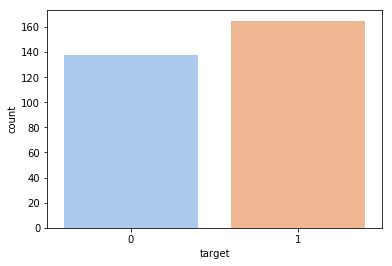

In [129]:
# Finding the number of patients with heart disease.
sns.countplot(x="target",data=data,palette="pastel")
plt.show()

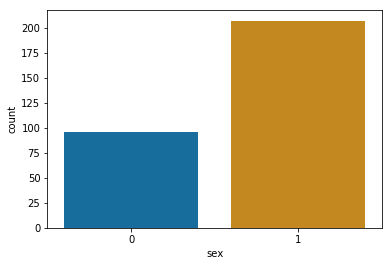

In [130]:
# Finding the ration of males and females in the data (1 = male; 0 = female)
sns.countplot(x="sex",data=data,palette="colorblind")
plt.show()

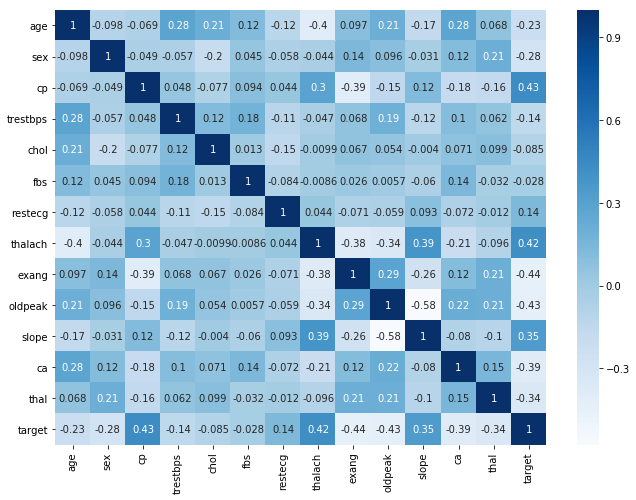

In [131]:
# Finding correaltion between all the parameters in the dataset.
fig,ax = plt.subplots(figsize=(11,8))
sns.heatmap(data.corr(),annot=True,cmap="Blues" ,ax=ax)
plt.show()

As wee see that cp, restecg, ca, thal and slope are categorical variables so we turn them into dummy variables.

In [132]:
# creating dummy variables
a=pd.get_dummies(data["cp"],prefix="cp")
b=pd.get_dummies(data["restecg"],prefix="restecg")
c=pd.get_dummies(data["ca"],prefix="ca")
d=pd.get_dummies(data["thal"],prefix="thal")
e=pd.get_dummies(data["slope"],prefix="slope")

In [133]:
# joining dummy variables in the dataset.
data=pd.concat([data,a,b,c,d],axis=1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,restecg_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,0,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,0,0,0,1,0


In [134]:
# no. of rows and columns after addition of dummy variables
data.shape

(303, 30)

In [135]:
# dropping of columns whose dummy variables have been created.
data=data.drop(columns=["cp","restecg","thal","ca","slope"])
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,restecg_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,1,0,...,0,1,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,1,0,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,1,0,...,0,1,0,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,1,...,0,1,0,0,0,0,0,0,1,0


In [136]:
# x= independent variables
x=data.drop("target",axis=1)
x.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,restecg_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,1,0,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,1,0,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,1,0,0,0,0,0,0,1,0


In [137]:
# y=dependent variable (target) 
y=data["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [138]:
# splitting data into train and test set.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Logistic Regression

In [140]:
# making object classifier of class LogisticRegression 
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [141]:
# Fitting training data set into classifier
classifier.fit(x_train,y_train)

C:\Users\praveen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [142]:
# Predicting test results
y_pred=classifier.predict(x_test)

In [143]:
# Making confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[23,  4],
       [ 3, 31]], dtype=int64)

Number of correct predictions : 23 + 31 = 54

Number of incorrect predictions : 3 + 4 = 7

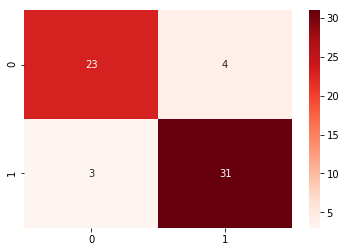

In [145]:
# Heatmap of confusion matrix
sns.heatmap(pd.DataFrame(cm),annot=True,cmap="Reds")
plt.show()

Performance Measures :

In [146]:
print("Accuracy = ",accuracy_score(y_test,y_pred)*100,"%")
print("Precision = ",precision_score(y_test,y_pred)*100,"%")
print("Recall Score = ",recall_score(y_test,y_pred)*100,"%")

Accuracy =  88.52459016393442 %
Precision =  88.57142857142857 %
Recall Score =  91.17647058823529 %


In [147]:
sensitivity = cm[1,1]/(cm[1,1] + cm[1,0])
print ("Sensitivity =",sensitivity)
specificity= cm[0,0]/(cm[0,0] + cm[0,1])
print("Specificity =",specificity)

Sensitivity = 0.9117647058823529
Specificity = 0.8518518518518519


ROC Curve and AUC Value : Receiver Operating Characteristics (ROC) Curve is a graph between True Positive Rate (y-axis) and False Positive Rate (x-axis). AUC Value is the area under ROC curve. 

AUC = 0 -- Bad Model

AUC = 1 -- Good Model

In [148]:
# calculating AUC
auc=roc_auc_score(y_test,y_pred)
auc

0.8818082788671023

In [149]:
# calculating ROC curve
fpr,tpr,thresholds= roc_curve(y_test,y_pred)

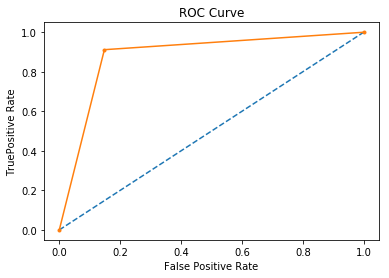

In [150]:
# plotting the roc curve for the model
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("TruePositive Rate")
plt.title("ROC Curve")
plt.show()

# KNN Classifier

In [151]:
# making object classifier of class KNeighborsClassifier 
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)

In [152]:
# Fitting training data set into classifier
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [153]:
# Predicting test results
y_pred=classifier.predict(x_test)

In [154]:
# Making confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[17, 10],
       [12, 22]], dtype=int64)

Number of correct predictions : 17 + 22 = 39

Number of incorrect predictions : 10 + 12 = 22 

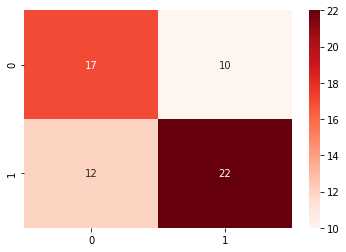

In [155]:
# Heatmap of confusion matrix
sns.heatmap(pd.DataFrame(cm),annot=True,cmap="Reds")
plt.show()

Performance Measures :

In [156]:
print("Accuracy = ",accuracy_score(y_test,y_pred)*100,"%")
print("Precision = ",precision_score(y_test,y_pred)*100,"%")
print("Recall Score = ",recall_score(y_test,y_pred)*100,"%")

Accuracy =  63.934426229508205 %
Precision =  68.75 %
Recall Score =  64.70588235294117 %


In [157]:
sensitivity = cm[1,1]/(cm[1,1] + cm[1,0])
print ("Sensitivity =",sensitivity)
specificity= cm[0,0]/(cm[0,0] + cm[0,1])
print("Specificity =",specificity)

Sensitivity = 0.6470588235294118
Specificity = 0.6296296296296297


ROC Curve and AUC Value :

In [158]:
# calculating AUC
auc=roc_auc_score(y_test,y_pred)
auc

0.6383442265795207

In [159]:
# calculating ROC curve
fpr,tpr,thresholds= roc_curve(y_test,y_pred)

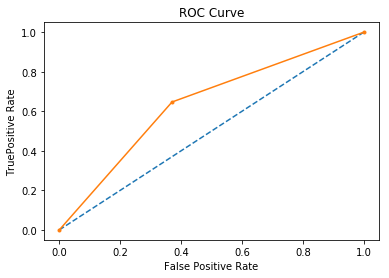

In [160]:
# plotting the roc curve for the model
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("TruePositive Rate")
plt.title("ROC Curve")
plt.show()

In [162]:
# Cross Validation : Calculating cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier,x_train,y_train,cv=10,scoring="accuracy")
score

array([0.61538462, 0.66666667, 0.625     , 0.625     , 0.58333333,
       0.54166667, 0.66666667, 0.66666667, 0.5       , 0.70833333])

In [163]:
score.mean()

0.6198717948717948

# SVM Classifier

In [164]:
# making object classifier of class SVC
from sklearn.svm import SVC
classifier= SVC(kernel="linear")

In [165]:
# Fitting training data set into classifier
classifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [166]:
# Predicting test results
y_pred=classifier.predict(x_test)

In [167]:
# Making confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[22,  5],
       [ 5, 29]], dtype=int64)

Number of correct predictions : 22 + 29 = 51

Number of incorrect predictions : 5 + 5 = 10

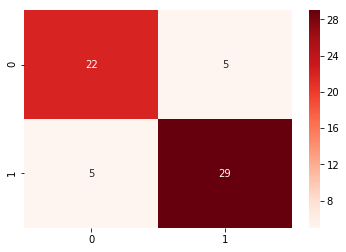

In [168]:
# Heatmap of confusion matrix
sns.heatmap(pd.DataFrame(cm),annot=True,cmap="Reds")
plt.show()

Performance Measures :

In [169]:
print("Accuracy = ",accuracy_score(y_test,y_pred)*100,"%")
print("Precision = ",precision_score(y_test,y_pred)*100,"%")
print("Recall Score = ",recall_score(y_test,y_pred)*100,"%")

Accuracy =  83.60655737704919 %
Precision =  85.29411764705883 %
Recall Score =  85.29411764705883 %


In [170]:
sensitivity = cm[1,1]/(cm[1,1] + cm[1,0])
print ("Sensitivity =",sensitivity)
specificity= cm[0,0]/(cm[0,0] + cm[0,1])
print("Specificity =",specificity)

Sensitivity = 0.8529411764705882
Specificity = 0.8148148148148148


ROC Curve and AUC Value :

In [171]:
# calculating AUC
auc=roc_auc_score(y_test,y_pred)
auc

0.8338779956427016

In [172]:
# calculating ROC curve
fpr,tpr,thresholds= roc_curve(y_test,y_pred)

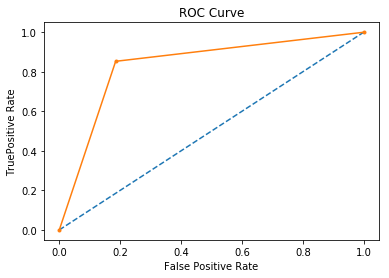

In [173]:
# plotting the roc curve for the model
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("TruePositive Rate")
plt.title("ROC Curve")
plt.show()

# Naive Bayes Classifier

In [174]:
# making object classifier of class GaussianNB
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [175]:
# Fitting training data set into classifier
classifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [176]:
# Predicting test results
y_pred=classifier.predict(x_test)

In [177]:
# Making confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[20,  7],
       [ 3, 31]], dtype=int64)

Number of correct predictions : 20 + 31 = 51

Number of incorrect predictions : 7 + 3 = 10

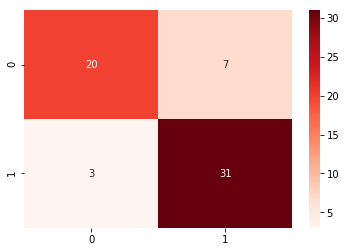

In [178]:
# Heatmap of confusion matrix
sns.heatmap(pd.DataFrame(cm),annot=True,cmap="Reds")
plt.show()

Performance Measures :

In [179]:
print("Accuracy = ",accuracy_score(y_test,y_pred)*100,"%")
print("Precision = ",precision_score(y_test,y_pred)*100,"%")
print("Recall Score = ",recall_score(y_test,y_pred)*100,"%")

Accuracy =  83.60655737704919 %
Precision =  81.57894736842105 %
Recall Score =  91.17647058823529 %


In [180]:
sensitivity = cm[1,1]/(cm[1,1] + cm[1,0])
print ("Sensitivity =",sensitivity)
specificity= cm[0,0]/(cm[0,0] + cm[0,1])
print("Specificity =",specificity)

Sensitivity = 0.9117647058823529
Specificity = 0.7407407407407407


ROC Curve and AUC Value :

In [181]:
# calculating AUC
auc=roc_auc_score(y_test,y_pred)
auc

0.8262527233115468

In [182]:
# calculating ROC curve
fpr,tpr,thresholds= roc_curve(y_test,y_pred)

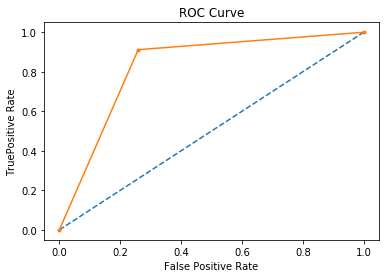

In [183]:
# plotting the roc curve for the model
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("TruePositive Rate")
plt.title("ROC Curve")
plt.show()

# Decision Tree Classifier

In [184]:
# making object classifier of class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="gini",random_state=0)

In [185]:
# Fitting training data set into classifier
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [186]:
# Predicting test results
y_pred=classifier.predict(x_test)

In [187]:
# Making confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[21,  6],
       [ 8, 26]], dtype=int64)

Number of correct predictions : 21 + 26 = 47

Number of incorrect predictions : 8 + 6 = 14

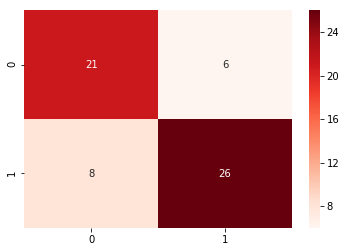

In [188]:
# Heatmap of confusion matrix
sns.heatmap(pd.DataFrame(cm),annot=True,cmap="Reds")
plt.show()

Performance Measures :

In [189]:
print("Accuracy = ",accuracy_score(y_test,y_pred)*100,"%")
print("Precision = ",precision_score(y_test,y_pred)*100,"%")
print("Recall Score = ",recall_score(y_test,y_pred)*100,"%")

Accuracy =  77.04918032786885 %
Precision =  81.25 %
Recall Score =  76.47058823529412 %


In [190]:
sensitivity = cm[1,1]/(cm[1,1] + cm[1,0])
print ("Sensitivity =",sensitivity)
specificity= cm[0,0]/(cm[0,0] + cm[0,1])
print("Specificity =",specificity)

Sensitivity = 0.7647058823529411
Specificity = 0.7777777777777778


ROC Curve and AUC Value :

In [191]:
# calculating AUC
auc=roc_auc_score(y_test,y_pred)
auc

0.7712418300653595

In [192]:
# calculating ROC curve
fpr,tpr,thresholds= roc_curve(y_test,y_pred)

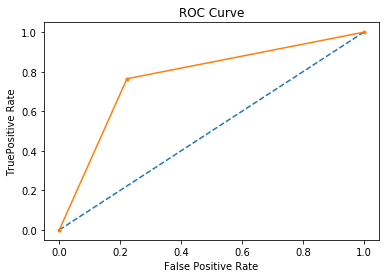

In [193]:
# plotting the roc curve for the model
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("TruePositive Rate")
plt.title("ROC Curve")
plt.show()

# Random Forest Classifier

In [194]:
# making object classifier of class RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion="gini")

In [195]:
# Fitting training data set into classifier
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [196]:
# Predicting test results
y_pred=classifier.predict(x_test)

In [197]:
# Making confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[23,  4],
       [ 6, 28]], dtype=int64)

Number of correct predictions : 23 + 28 = 52

Number of incorrect predictions : 4 + 6 = 10

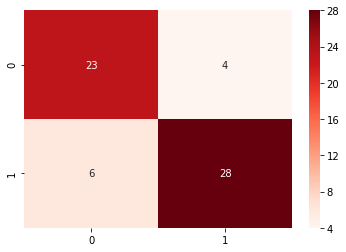

In [198]:
# Heatmap of confusion matrix
sns.heatmap(pd.DataFrame(cm),annot=True,cmap="Reds")
plt.show()

Performance Measures :

In [199]:
print("Accuracy = ",accuracy_score(y_test,y_pred)*100,"%")
print("Precision = ",precision_score(y_test,y_pred)*100,"%")
print("Recall Score = ",recall_score(y_test,y_pred)*100,"%")

Accuracy =  83.60655737704919 %
Precision =  87.5 %
Recall Score =  82.35294117647058 %


In [200]:
sensitivity = cm[1,1]/(cm[1,1] + cm[1,0])
print ("Sensitivity =",sensitivity)
specificity= cm[0,0]/(cm[0,0] + cm[0,1])
print("Specificity =",specificity)

Sensitivity = 0.8235294117647058
Specificity = 0.8518518518518519


ROC Curve and AUC Value :

In [201]:
# calculating AUC
auc=roc_auc_score(y_test,y_pred)
auc

0.8376906318082789

In [202]:
# calculating roc curve
fpr,tpr,thresholds= roc_curve(y_test,y_pred)

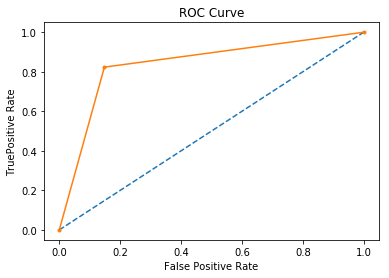

In [203]:
# plotting the roc curve for the model
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("TruePositive Rate")
plt.title("ROC Curve")
plt.show()

# Comparison Between Classifiers

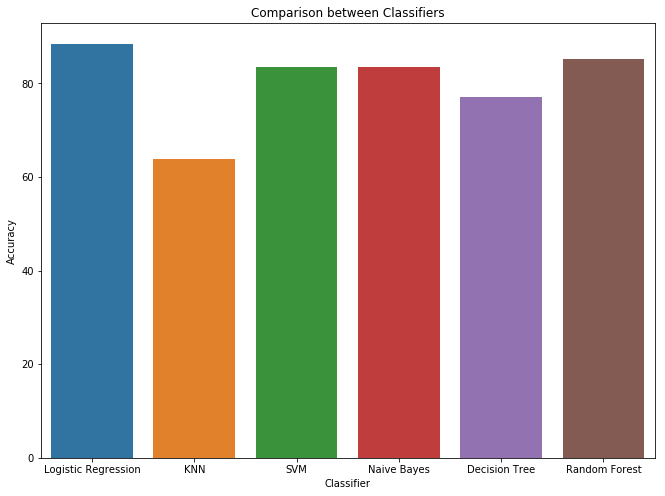

In [204]:
methods = ["Logistic Regression", "KNN", "SVM", "Naive Bayes", "Decision Tree", "Random Forest"]
accuracy = [88.5,63.93,83.6,83.6,77.04,85.24]
plt.subplots(figsize=(11,8))
sns.barplot(x=methods,y=accuracy)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Comparison between Classifiers")
plt.show()

From above graph we can say that Logistic Regression classification model is best suited for our dataset with accuraacy of 88.5% and KNN classification model is least suite with accuracy of 63.93%.